# Machine Learning Project - Personalized movie recommender system

### Brandy Piao, Alessandro Previero 

## Movie features collection from TMDB

In [7]:
tmdb = TMDb()
tmdb.api_key = '649a7714c6dfe32d9943fdc837c42c00'

In [8]:
# IMPORT REQUIRED PACKAGES 
import pandas as pd
import time
import numpy as np
from tmdbv3api import TMDb
from tmdbv3api import Movie

In [9]:
# LOAD and PRE-PROCESS TMDB MOVIE KEYS 
links = pd.read_csv("links.csv")
TM_id = links.iloc[:,2].dropna().astype('int64').reset_index();

In [23]:
# FETCH MOVIE FEATURES USING TMDB API 

movieID = TM_id.iloc[:,1]
movie = Movie()

features = {}
count = 0
Vars = ['id','title','revenue', 'budget', 'adult', 'runtime', 'popularity','vote_average', 'vote_count', 'original_language',
        'release_date', 'production_countries', 'production_companies']

print("Begin collection...\n\nParsing information on:\n")
for name in Vars:
    temp = []

    print("movie ", name)
    
    for Id in movieID[0:1000]:

        count += 1
        m = movie.details(Id)
        
        try:
            val = getattr(m, name)
            if name == "production_countries":
                val = val[0]['iso_3166_1']

            elif name == "production_companies":
                val = val[0]['name']

        except:
            val = np.nan
        
        temp.append(val)
        
        if count > 38:
            time.sleep(9)
            count = 0
        
    features[name] = temp

featuresDF = pd.DataFrame(features)
featuresDF.to_csv("MovieFeatures.csv")

Begin collection...

Parsing information on:

movie  id
movie  title


KeyboardInterrupt: 

In [22]:
len(movieID)
len(np.unique(movieID))

9734

## Matrix Imputation from Julia code 

---

## Recommendation system

In [7]:
# IMPORT REQUIRED PACKAGES 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
# READ-IN COMPLETE RATINGS DATASET
fullRatings = pd.read_csv("imputed.csv", header = None)

### Clustering 

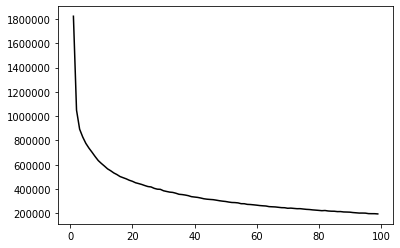

In [14]:
# PERFORM SEVERAL TYPES OF CLUSTERING AND INTERPRET DIFFERENT RESULTS 

# K-MEANS CLUSTERING on FULL MATRIX
SSEs = []

for k in range(1, 100):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 25).fit(fullRatings)
    SSEs.append(kmeans.inertia_)
    
plt.plot(range(1,100), SSEs, 'k')
plt.xlabel("Number of clusters")
plt.ylabel("Intertia, SSD")

Text(0, 0.5, 'Intertia, SSD')

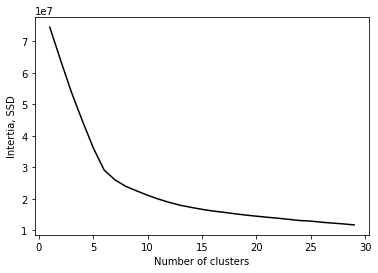

In [21]:
# K-MEANS CLUSTERING on USER RANK MATRIX 
SSE_u = []

fullUser =  pd.read_csv("userImp.csv", header = None)
for k in range(1,30):
    kmUser = KMeans(n_clusters=k, random_state=0, n_init = 50).fit(fullUser)
    SSE_u.append(kmUser.inertia_)
    
plt.plot(range(1, 30), SSE_u, 'k')
plt.xlabel("Number of clusters")
plt.ylabel("Intertia, SSD")

**We observe similar elbow plots for the dependence of sum of squared distances (SSD) with number of clusters. This is indicative of a low-rank behaviour, where users base their movie ratings on few parameters only, independent of the specific movie. Consequently, we can perform analysis on the rank-user matrix, and use OCTs to interpret the experimental results**.

---

In [25]:
# RE-RUN CLUSTERING ON K= {6, 10} and RETRIEVE ASSOCIATED LABELS
labels = {}

for k in range(6,11):
    kmUser = KMeans(n_clusters=k, random_state=0, n_init = 50).fit(fullUser)
    labels['label'+ str(k)] = (kmUser.labels_)
    
# MERGE LABELS WITH ORIGINAL MATRIX and SAVE CSV FILE
labels2 = pd.DataFrame(labels)
fullMat = fullUser.join(labels2)

fullMat.to_csv("labeledRatings.csv")